<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#f25625">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Temas Selectos de Ingeniería en Computación III</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-1</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="6" color="#f25625">Laboratorio 6: Algoritmos Cuánticos IV</font></td>
    </tr>
</table>

<p style="text-align:right; font-weight:bold;">Autora: Claudia Zendejas-Morales</p>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

## Contenido

1. [Introducción](#1)
2. [Quantum Fourier Transform (QFT)](#2)
   1. [Discrete Fourier Transform](#2.1)
   2. [Quantum Fourier Transform](#2.2)
   3. [Implementación en Qiskit](#2.3)
   4. [QFT Inversa](#2.4)
3. [Quantum Phase Estimation](#3)
   1. [Algoritmo de QPE](#3.1)
   2. [Implementación en Qiskit](#3.2)
4. [Algoritmo de búsqueda de orden](#4)
   1. [Algoritmo](#4.1)
   2. [Fracciones continuas](#4.2)
   3. [Implementación en Qiskit](#4.3)
6. [Algoritmo de Shor](#5)
   1. [Algoritmo](#5.1)
   2. [Ejemplo: Factorización de 21](#5.2)

<a id="1"></a>
# 1. Introducción

El **algoritmo de Shor** es uno de los algoritmos más conocidos en computación cuántica debido a su capacidad para factorizar números enteros de manera eficiente, una tarea que es computacionalmente difícil para las computadoras clásicas. La factorización eficiente tiene importantes implicaciones en áreas como la **criptografía**, ya que muchos sistemas de seguridad se basan en la dificultad de factorizar números grandes.

Este algoritmo combina técnicas cuánticas y clásicas para resolver el problema de factorización. Sin embargo, para entender y ejecutar el algoritmo de Shor, es necesario conocer varios conceptos fundamentales y subrutinas. Estos componentes forman la base del algoritmo y se utilizan en diferentes etapas del proceso de factorización.

A continuación, se presenta el **diagrama de bloques del algoritmo de Shor**. Este diagrama ilustra cómo está estructurado el algoritmo, destacando las principales subrutinas y bloques de procesamiento clásico y cuántico:

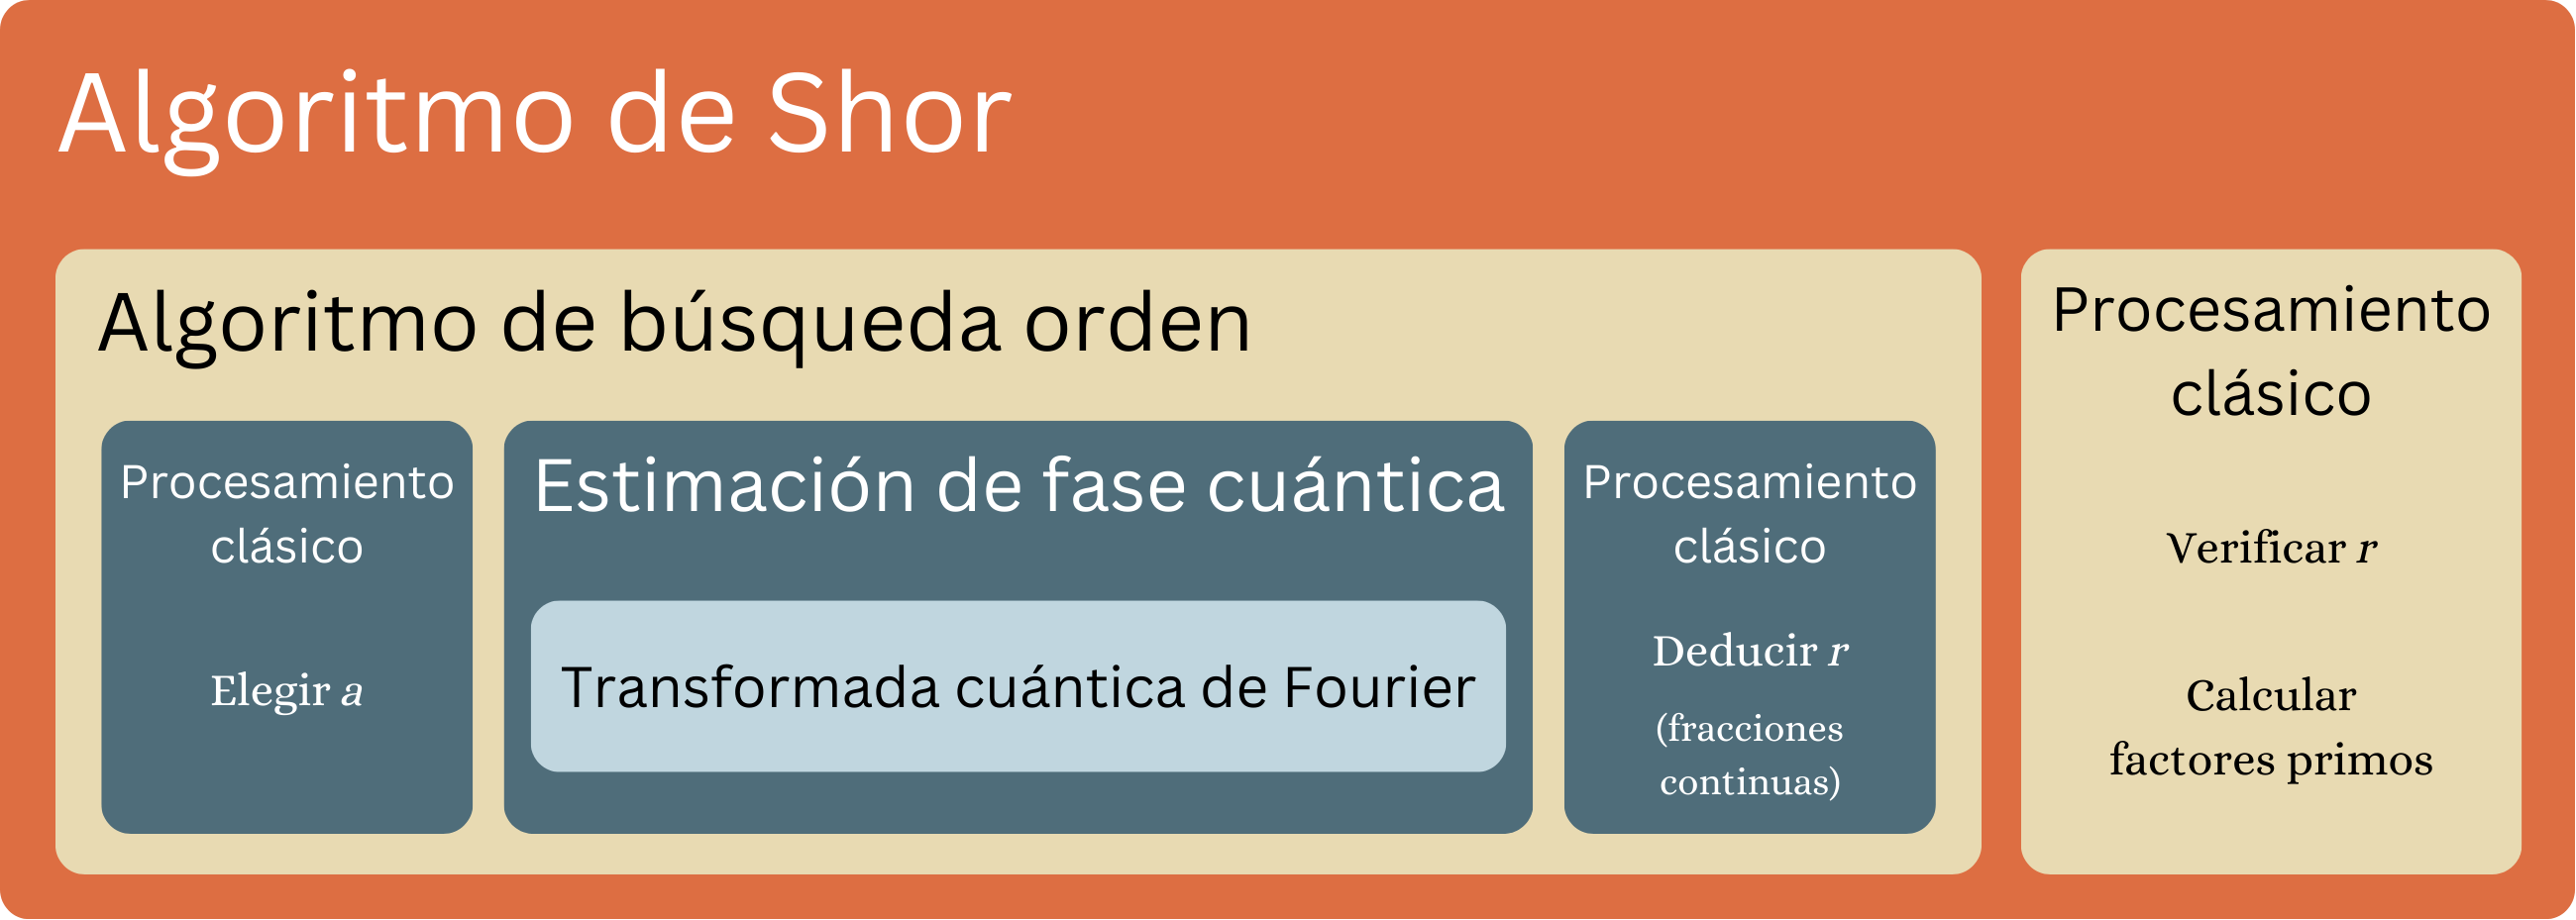

- **Transformada Cuántica de Fourier (QFT)**: Es una subrutina cuántica utilizada para obtener información sobre las fases.
- **Estimación de Fase Cuántica (QPE)**: Utiliza la QFT para estimar la fase de un operador unitario, lo cual es crucial en la búsqueda de órdenes.
- **Algoritmo de Búsqueda de Orden**: Esta es la parte cuántica central del algoritmo de Shor. Utiliza QPE para encontrar el periodo u _orden_ de una función, que es clave para la factorización.
- **Procesamiento Clásico**: El algoritmo de Shor también requiere bloques de procesamiento clásico. Estos bloques se encargan de la preparación inicial (como la elección de parámetros), la interpretación de los resultados cuánticos, y finalmente la verificación y cálculo de los factores primos.

Este diagrama refleja el orden de construcción que seguiremos en el notebook, desde los componentes más internos (como la QFT) hasta el conjunto completo del algoritmo de Shor.

<a id="2"></a>
# 2. Quantum Fourier Transform (QFT)

Las transformaciones son muy populares en matemáticas y ciencias de la computación. Ayudan a *transformar* un problema en otro problema cuya solución se conoce.

Lo que hace especial a la Transformada de Fourier es que se puede calcular más rápido en una computadora cuántica que en una computadora clásica.

Primero veamos la versión clásica: DFT, ya que nos ayudará a entender mejor la versión cuántica: QFT.

<a id="2.1"></a>
## 2.1. Discrete Fourier Transform

La **Transformda Discreta de Fourier** (Discrete Fourier Transform, $DFT$) de un vector $\vec{x}=\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ es el vector complejo $\vec{y}=\pmatrix{y_0~y_1\dots y_{N-1}}^T$ donde

$$
y_k=\frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}e^{\frac{2\pi i j k }{N}}x_j
$$

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: 

$$ $$
Dado $\vec{x}=\pmatrix{1\\2}$ transformarlo con DFT para obtener $\vec{y}$.

Cuando $k=0$:

$$
y_0=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}e^{\frac{2\pi ij\cdot 0}{2} }x_j= \frac{1}{\sqrt{2}}  (x_0+x_1) = \frac{3}{\sqrt{2}}
$$

Cuando $k=1$:

$$
y_1=\frac{1}{\sqrt{2}} \sum_{j=0}^{1}e^{\frac{2\pi ij\cdot 1}{2}}x_j= \frac{1}{\sqrt{2}} \biggl( e^{\frac{2\pi i \cdot0 \cdot1}{2}} x_0 +  e^{\frac{2\pi i \cdot 1 \cdot 1}{2}} x_1 \biggr)  = \frac{1+  2e^{\pi i}}{\sqrt{2}}=\frac{-1}{\sqrt{2}}.
$$

Entonces,

$$\vec{y}=\pmatrix{\frac{3}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}}}$$

$DFT$ identifica periodos en los datos. Veamos un ejemplo:

Vamos a crear la siguiente lista en Python `(1 0 0 0 0 1 0 0 0 0 ... 1 0 0 0 0)` de longitud $N=100$ donde cada 5to valor (periodo $r$) es igual a 1 y el resto son ceros.

Luego calcularemos su $DFT$ usando Python y graficaremos el comportamiento del resultado.

In [1]:
# creamos una lista vacía
x = []
# número de elementos en la lista
N = 100    # este N no está restringido
# colocamos cada quinto elemento un 1, en el resto ceros
for i in range(N):
    if i%5 == 0:
        x.append(1)
    else:
        x.append(0)

In [2]:
from cmath import exp
from math import pi
from math import sqrt

# calculamos la DFT de la lista (el vector 'x')
y = []
for k in range(N):
    s=0
    for j in range(N):
        s += exp(2*pi*1j*j*k/N)*x[j]
    s *= 1/sqrt(N)
    y.append(s)

/Users/clausia/anaconda3/envs/ccuantico2025i/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/clausia/anaconda3/envs/ccuantico2025i/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


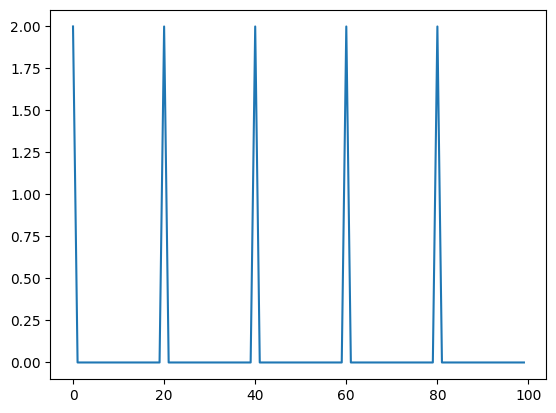

In [3]:
import matplotlib.pyplot as plt

# visualizamos la lista transformada
plt.plot(y)
plt.show()

Notamos que hay picos cada $20$ elementos, esto porque:

$$\frac{N}{r}=\frac{100}{5}=20$$

¿Qué pasa si hay dos señales?

- $\vec{x}$ con periodo $r_1$
- $\vec{z}$ con periodo $r_2$

Entonces al calcular la DFT de la suma de ambas señales:

$$\vec{y}=DFT(\vec{x}+\vec{z})$$

Se tendrán picos al los múltiplos de 

$$\frac{N}{r_1}~~~~~~~~~~~\texttt{y}~~~~~~~~~~~\frac{N}{r_2}$$

<a id="2.2"></a>
## 2.2. Quantum Fourier Transform

Ahora, supongamos que tenemos un vector que representa un estado cuántico que es $N=2^n$-dimensional $\vec{x}=\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ que podemos escribir como sigue

$$
\ket{\psi} = \sum_{j=0}^{N-1} x_j \ket{j}
$$

Aquí $\ket{j}$ tiene un $1$ en la posición $x_j$, el resto de los elementos son $0$.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>: Estado de Bell

$$\ket{\beta_{00}}=\frac{1}{\sqrt2}\left(\ket{00}+\ket{11}\right)=\pmatrix{\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}}=\frac{1}{\sqrt2}\ket{0}+\frac{1}{\sqrt2}\ket{3}$$

Recordando que los elementos de la base son:

$$\ket{00}=\pmatrix{1\\0\\0\\0}~~~,~~~\ket{01}=\pmatrix{0\\1\\0\\0}~~~,~~~\ket{10}=\pmatrix{0\\0\\1\\0}~~~,~~~\ket{11}=\pmatrix{0\\0\\0\\1}$$

Entonces

$$\ket{00}+\ket{11}=\pmatrix{1\\0\\0\\1}$$

con

$$\vec{x}=\pmatrix{\frac{1}{\sqrt2}\\0\\0\\\frac{1}{\sqrt2}}$$

Entonces, la **Transformada Cuántica de Fourier** (Quantum Fourier Transform $QFT$) del estado $\ket{\psi}$ está dada por

$$
\ket{\phi}=\sum_{k=0}^{N-1}y_k \ket{k} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}e^{\frac{2\pi i j k }{N}}x_j \ket{k}
$$

donde $y_k$ está definido como se indicó arriba, para $k=0,\dots,N-1$, por lo que se sustituye obteniendo la expresión de la derecha.

_En otras palabras, la QFT es la DFT de estados cuánticos._

**La QFT es exponencialmente más eficiente que la DFT**.

- QFT: $O(n^2) = O(\log^2 N)$ operaciones
- DFT: $O(n2^n)=O(N\log N)$ operaciones

La $QFT$ es una transformación con la siguiente representación matricial:

$$QFT =  \frac{1}{\sqrt{N}} \pmatrix{1 & 1 & 1 &1  & \cdots & 1 \\ 1 & \omega & \omega^2 & \omega^3 & \cdots& \omega^{N-1} \\ 1 & \omega^2 &\omega^4 & \omega^6  & \cdots& \omega^{2N-2} \\ 1 & \omega^3 & \omega^6 & \omega^9 & \cdots& \omega^{3N-3} \\ \vdots &  \vdots &  \vdots &  \vdots &  \ddots &  \vdots \\ 1 & \omega^{N-1} & \omega^{2N-2} & \omega^{3N-3} & \cdots& \omega^{(N-1)(N-1)}}$$

donde $ \omega = e^{\frac{2\pi i}{N}} $.

Por lo tanto, para un estado base $\ket{j}$ representado por el vector $\pmatrix{x_0~x_1\dots~x_{N-1}}^T$ donde $x_j=1$ y el resto de las entradas son $0$, su $QFT$ está dada por

$$
QFT\ket{j}=\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}e^{\frac{2\pi i j k }{N}} \ket{k} = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}{\omega^{ j k} } \ket{k}
$$

Alternativamente:

$$ \ket{j} =  \pmatrix{0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0}  \xrightarrow{QFT}
 \frac{1}{\sqrt{N}} \left(
     \omega^{0} \ket{0} + \omega^{j} \ket{1} + \omega^{2j}\ket{2} + \cdots + \omega^{j(N-1)} \ket{N-1}\right) = \frac{1}{\sqrt{N}} \pmatrix{ 1 \\ \omega^j \\ \omega^{2j} \\ \vdots \\ \omega^{j(N-1)} }
$$

Ahora veamos el efecto de aplicar $QFT$ a un sistema de $n$-qubits. Sea $N=2^n$.

Sea $\ket{j}$ un estado base, es decir, un estado del conjunto: $ \{ \ket{0},\ldots,\ket{N-1} \} $.

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: Expansión binaria de números

$$9=1(2^3)+0(2^2)+0(2^1)+1(2^0)\equiv_2 1001$$

$$0.75=\frac{1}{2}+\frac{1}{4}=1(2^{-1})+1(2^{-2})\equiv_2 0.11$$

$$\Rightarrow 9.75\equiv_2 1001.11$$

Multiplicando por $2$, tenemos

\begin{align*}
2(1001.11)&\equiv_{10} 1(2^3)2+0(2^2)2+0(2^1)2+1(2^0)2 \, + \, 1(2^{-1})2+1(2^{-2})2\\
&= \, \, \, \, \, 1(2^4)+0(2^3)+0(2^2)+1(2^1) \, + \, 1(2^{0})+1(2^{-1})\\
&\equiv_{2} 10011.1
\end{align*}

Es decir, el punto se recorrió una posición.

Podemos expresar $ \ket{j} = \ket{j_1 j_2 \cdots j_n } = \ket{j_1} \otimes \ket{j_2} \otimes \cdots \otimes \ket{j_n}$, donde $ (j_1 j_2 \cdots j_n) $ es la representación binaria de $n$ dígitos de $ j $:

$$ \begin{array}{rcl} j & = &  j_1 2^{n-1} + j_2 2^{n-2} + \cdots + j_n 2^0 \\ j & = & 2^n \sum_{l=1}^n 2^{-l} j_l \\  j & = & 2^{n}(0.j_1 j_2 \cdots j_n) \\ \dfrac{j}{N} & = & 0.j_1 j_2 \cdots j_n \end{array}$$

Entonces, el estado resultante al aplicar $QFT$ a un estado base es:

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}  
    \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_n ]} } \ket{1} \right) \otimes  
    \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_{n-1}j_n ]} } \ket{1} \right) \otimes
    \cdots  \otimes
    \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)
$$

Al diseñar el circuito, se considera el estado en orden inverso:

$$\dfrac{1}{\sqrt{N}} \underbrace{\left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_1\cdots j_n]} } \ket{1} \right)}_{q_1} \otimes \underbrace{\left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_2\cdots j_n]} } \ket{1} \right)}_{q_2} \otimes \cdots  \otimes \underbrace{\left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_{n-1}j_n]} } \ket{1} \right)}_{q_{n-1}} \otimes \underbrace{\left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_n]} } \ket{1} \right)}_{q_n}$$

Para lograrlo, se usa la compuerta de fase $ R_m = \pmatrix{1 & 0 \\ 0 & e^{\frac{2 \pi i}{2^m}}} $ en su versión controlada:

$$ CR_m = \pmatrix{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{ \frac{ 2\pi i}{2^m} } }  $$

Al final se aplican compuertas $SWAP$ para obtener el estado que realmente se debe obtener al aplicar $QFT$.

De este modo, el circuito cuántico que implemente $QFT$ es como sigue:

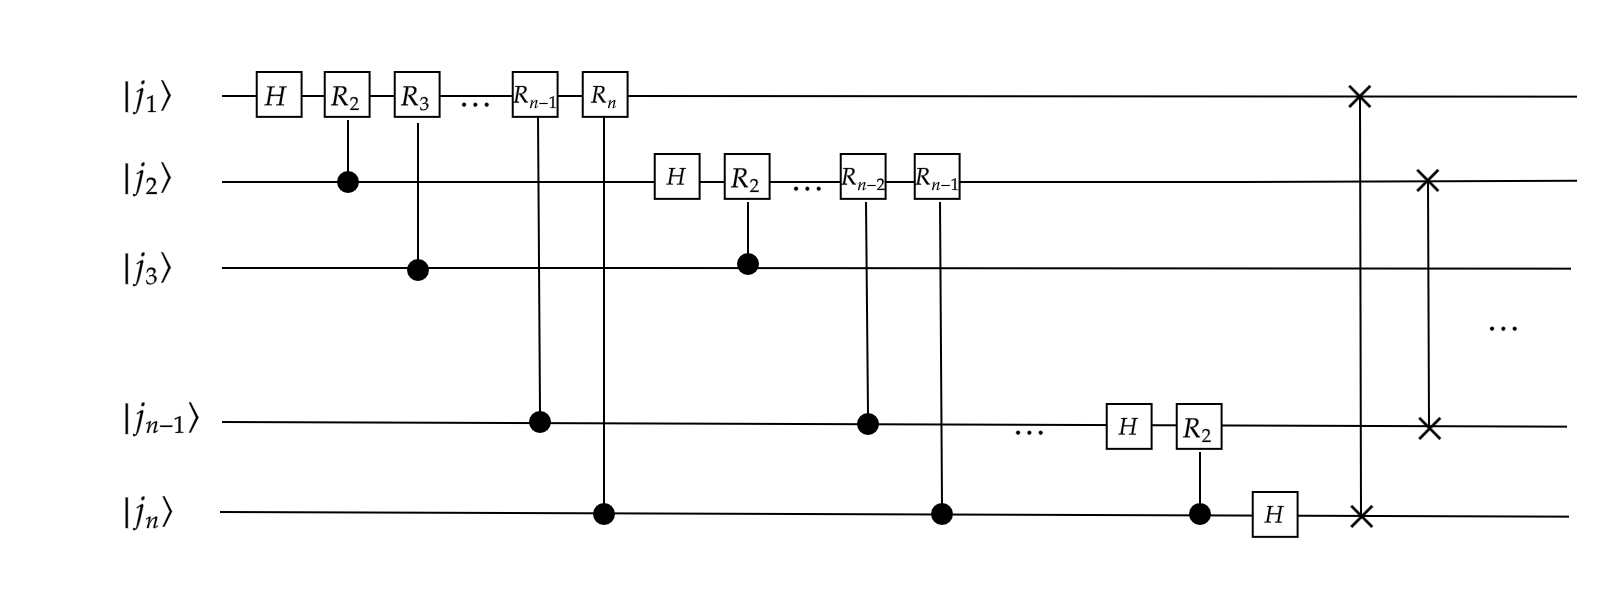

<a id="2.3"></a>
## 2.3. Implementación en Qiskit

En Qiskit podemos usar la siguiente compuerta incluida en el paquete principal:

$$CPhaseGate(\lambda) = \pmatrix{ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{ i\lambda } }$$

La cual puede ser aplicada a un objeto `QuantumCircuit` con el método `cp()`.

In [4]:
from qiskit import QuantumCircuit
import numpy as np

def miQFT(n):
    qft_circuit = QuantumCircuit(n)
    for j in reversed(range(n)):                  # considerar el orden invertido de qubits en Qiskit
        qft_circuit.h(j)
        for k in reversed(range(j)):
            qft_circuit.cp(np.pi/2**(j-k), k, j)
        qft_circuit.barrier()
    for i in range(n//2):
        qft_circuit.swap(i, n-i-1)
    return qft_circuit

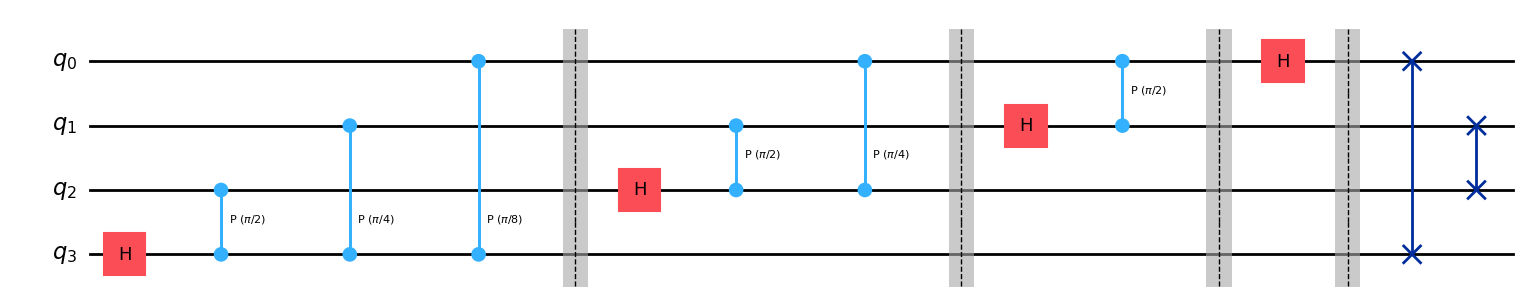

In [5]:
mi_qft_qc4 = miQFT(4)
mi_qft_qc4.draw('mpl')

Qiskit ya cuenta con una clase llamada `QFT` que permite crear este circuito:

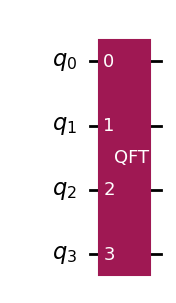

In [6]:
from qiskit.circuit.library import QFT

qft_qc4 = QFT(4, insert_barriers=True)
qft_qc4.draw('mpl')

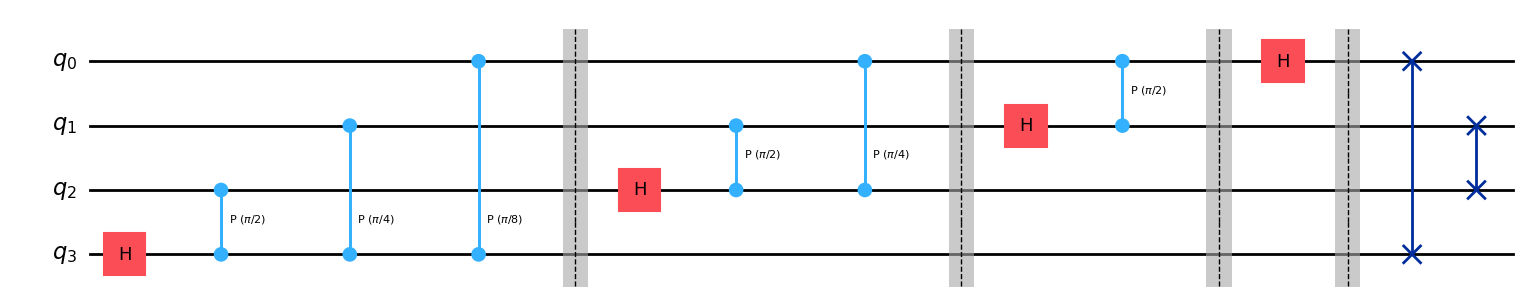

In [7]:
qft_qc4.decompose().draw('mpl')

<a id="2.4"></a>
## 2.4. QFT Inversa

En el algoritmo de Shor, y otros algoritmos, se usa la versión inversa de la $QFT$, también denotada por $QFT^{\dagger}$, cuya matriz está dada por:

$$QFT^\dagger =  \frac{1}{\sqrt{N}} \pmatrix{1 & 1 & 1 &1  & \cdots & 1\\ 1 & \omega^{-1} & \omega^{-2} & \omega^{-3} & \cdots& \omega^{-(N-1)} \\ 1 & \omega^{-2} &\omega^{-4} & \omega^{-6}  & \cdots& \omega^{-(2N-2)} \\ 1 & \omega^{-3} & \omega^{-6} & \omega^{-9} & \cdots& \omega^{-(3N-3)} \\ \vdots &  \vdots &  \vdots &  \vdots &  \ddots &  \vdots \\ 1 & \omega^{-(N-1)} & \omega^{-(2N-2)} & \omega^{-(3N-3)} & \cdots& \omega^{-(N-1)(N-1)}}$$

Para implementarla, podemos simplemente indicar que queremos la versión inversa del circuito con el método `inverse()`, o indicar el parámetro `inverse=True` en la clase `QFT`:

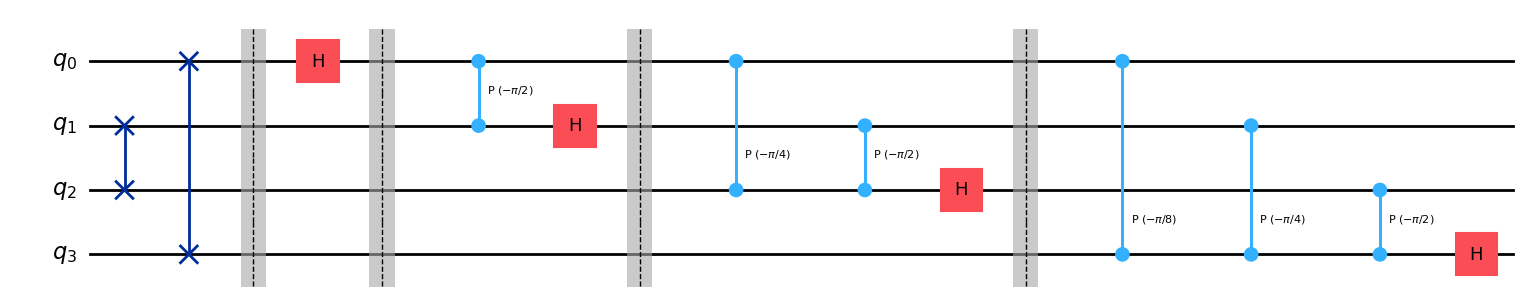

In [8]:
mi_qft_qc4.inverse().draw('mpl')

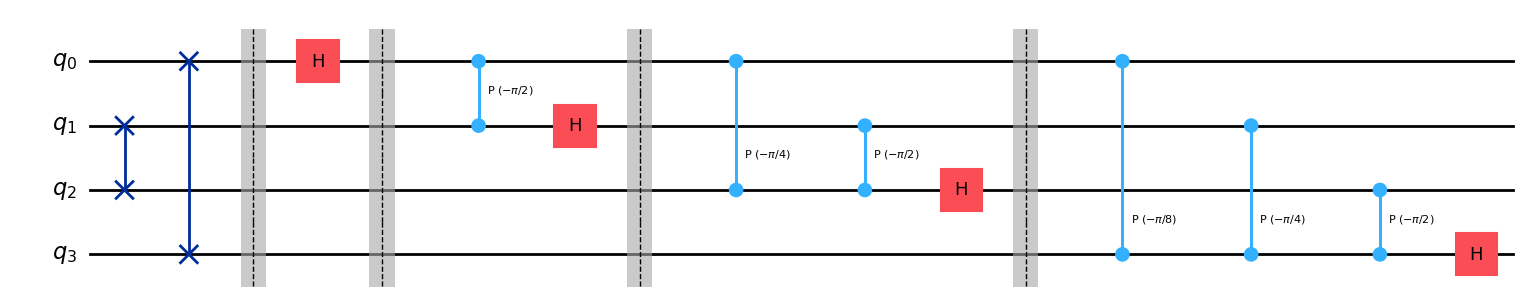

In [9]:
qft_qc4 = QFT(4, inverse=True, insert_barriers=True)
qft_qc4.decompose().draw('mpl')

<a id="3"></a>
# 3. Quantum Phase Estimation (QPE)

En esta sección hablaremos de una aplicación de la Transformada Cuántica de Fourier, que nos llevará en el camino hacia el Algoritmo de Shor.

Para una matriz dada $ A $, un vector $ \vec{v} $ distinto de cero se denomina su vector propio (eigenvector) si existe un valor escalar $ \lambda $ llamado valor propio (eigenvalor) que satisface

$$ A \cdot \vec{v} = \lambda \cdot \vec{v} $$

Las matrices unitarias preservan la longitud. Por lo tanto, sus valores propios deben tener una longitud de $1$, por lo que tienen la forma 

$$ \lambda=e^{2 \pi i \phi} $$

para algún $\phi \in [0,1)$.

Nuestro objetivo es, para una matriz unitaria dada $ U $ y su vector propio $ \ket{u} $, estimar la fase $ \phi $ del valor propio correspondiente, es decir

$$ e^{2 \pi i \phi} $$

La matriz $ U^k $ es la $ k $-ésima potencia de $ U $.

Como $ U \ket{u} = e^{2 \pi i \phi} \ket{u} $, podemos observar que $ U^k \ket{u} = \left( e^{2 \pi i \phi} \right)^k \ket{u} = e^{2 \pi i \phi k} \ket{u} $.

<div class="alert alert-block alert-info">
    <strong>Ejemplo</strong>: Mostrar que $\ket{-}$ y $\ket{+}$ son eigenvectores del operador $X$ con eigenvalores $-1$ y $1$ respectivamente

\begin{align*}
X \ket{-} = X \frac {\ket{0} - \ket{1}} {\sqrt{2}}
& =  \frac {\ket{1} - \ket{0}} {\sqrt{2}}\\
& = -\frac {\ket{0} - \ket{1}} {\sqrt{2}}\\
& = -\ket{-}
\end{align*}


\begin{align*}
X \ket{+} = X \frac {\ket{0} + \ket{1}} {\sqrt{2}}
& =  \frac {\ket{1} + \ket{0}} {\sqrt{2}}\\
& = \frac {\ket{0} + \ket{1}} {\sqrt{2}}\\
& = \ket{+}
\end{align*}

Por lo tanto, $ \ket{-}$ y $\ket{+}$ son vectores propios (o estados propios) del operador $ X $ con los valores propios $-1$ y $1$ respectivamente.

### Operador U-controlado

Sea $ U $ un operador unitario con estado propio $ \ket{\psi} $ y valor propio $ e^{2\pi i \phi} $ tal que $ U\ket{\psi} = e^{2{\pi}i{\phi}} \ket{\psi}$.

Comprobamos el efecto del operador $ U $ controlado ($CU$) sobre el qubit de control.

A continuación se muestran los casos en los que el qubit de control está en estado $ \ket{0} $ o $ \ket{1} $.

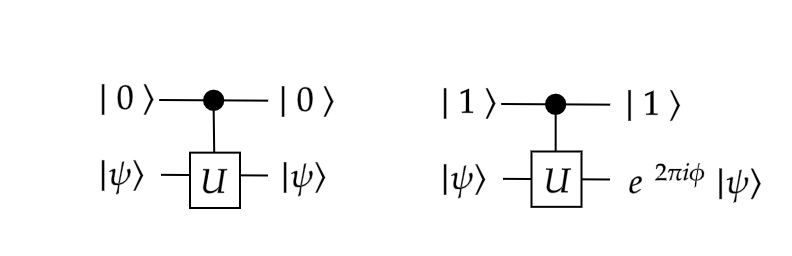

En el primer caso, el operador $ U $ no se aplica ya que el qubit de control está en $ \ket{0} $. Por lo tanto, tenemos:

$$ CU(\ket{0}\ket{\psi}) \rightarrow \ket{0}\ket{\psi} $$

En el segundo caso, el operador $ U $ se aplica al estado $ \ket{\psi} $ ya que el qubit de control está en $ \ket{1} $. Por lo tanto, tenemos:

$$ CU(\ket{1}\ket{\psi}) \rightarrow e^{2{\pi}i{\phi}}\ket{1}\ket{\psi} $$

El operador $ CU $ coloca una fase de $ e^{2\pi i \phi} $ delante del estado $ \ket{1} $ cuando el qubit de control está en superposición de los estados $ \ket{0} $ y $ \ket{1} $; es decir,

$ \begin{array}{rcl}
CU \left( \left( \dfrac{ \ket{0} + \ket{1} }{ \sqrt{2} } \right)  \ket{\psi} \right) & = &  \dfrac{1}{\sqrt{2}} \Bigg( CU \Big( \ket{0}\ket{\psi} + \ket{1}\ket{\psi} \Big) \Bigg) \\
& = & \dfrac{1}{\sqrt{2}} \Big( CU\ket{0}\ket{\psi} + CU \ket{1}\ket{\psi} \Big) \\
& = & \dfrac{1}{\sqrt{2}} \Big( \ket{0} \ket{\psi} + e^{2{\pi}i{\phi}}\ket{1}\ket{\psi} \Big) \\
& = & \dfrac{1}{\sqrt{2}} \Big( \big( \ket{0} + e^{2{\pi}i{\phi}}\ket{1} \big) \ket{\psi} \Big) \\
& = & \Bigg( \dfrac{ \ket{0} + e^{2{\pi}i{\phi}} \ket{1} }{\sqrt{2}} \Bigg) \ket{\psi}
\end{array}$

Por lo tanto, para un estado arbitrario, tenemos que

$$\alpha \ket{0}\ket{\psi} + \beta \ket{1}\ket{\psi} \xrightarrow{CU} \alpha \ket{0}\ket{ \psi} ~+~ e^{2{\pi}i{\phi}} \beta \ket{1}\ket{\psi} = (\alpha \ket{0} ~+~ e^{2{ \pi}i{\phi}} \beta \ket{1})\ket{\psi}$$

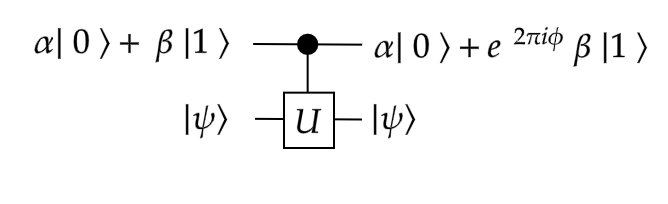

### Estimación de valores propios del operador $X$

Recordemos que $ \ket{+} $ y $ \ket{-} $ son los estados propios del operador $X$. Si aplicamos el operador $ CX $ al siguiente estado cuántico donde $ \ket{\psi} $ es $ \ket{+} $ o $ \ket{-} $, entonces, tenemos que:

\begin{align*}
CX \left(\frac {\ket{0} + \ket{1}} {\sqrt{2}} \ket{\psi} \right) \rightarrow \frac {\ket{0} + (-1)^x \ket{1}} {\sqrt{2}}\ket{\psi}
\end{align*}

Ahora, para determinar $ x $, se aplica una compuerta Hadamard, el valor dependerá del resultado.

Si el resultado es $ \ket{0} $, entonces $ x = 0 $ y si el resultado es $ \ket{1} $, entonces $ x = 1 $.

Notemos que este es un caso especial del problema de estimación de fase en el que intentamos estimar los valores propios del operador $ X $. En este caso, $ \phi $ es $ 0 $ o $ \frac{1}{2} $, que se puede determinar mediante un operador Hadamard. A continuación, veremos cómo lograr esto en general.

<a id="3.1"></a>
## 3.1. Algoritmo de QPE

Nuestra matriz unitaria $ U $ y el estado $\ket{\psi} $ es el vector propio dado.

Usamos dos registros.

- El primer registro contiene $ t $ qubits que están en el estado $ \ket{0} $.
  - $ t $ depende de la cantidad de dígitos de precisión y la probabilidad de éxito al estimar $ \phi $. Más adelante veremos los detalles de $ t $.
  - Nombramos estos qubits como $ q_1,q_2,\ldots,q_t$.

- El segundo registro almacena $ \ket{\psi} $.

Aplicamos una serie de operadores controlados $ U^{2^j} $ para $ j \in \{0,\ldots,t-1 \} $.

### Estado inicial

Comenzamos en el estado 
$$\underbrace{\left(\ket{0}\otimes\cdots\otimes\ket{0}\right)}_{1er~registro}\underbrace{\ket{\psi}}_{2do~registro}$$

### Operadores Hadamard

Primero aplicamos una compuerta Hadamard a cada qubit en el primer registro.

Entonces, el nuevo estado cuántico es

$$ \underbrace{\dfrac {1}{2^{t/2}} \big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\ket{1}\right) \big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

### Operadores $U^{2^j}$ controlados

Aplicamos el operador $ U^{2^j} $ al segundo registro, controlado por $ q_{t-j} $ en el primer registro, donde $j \in \{ 0,\ldots, t-1 \}$.

Como se explicó anteriormente, después de aplicar cada $ CU^{2^j} $, la fase relativa del qubit de control se actualizará en consecuencia.

- **$j=0$:** Aplicamos $CU^{2^0}$ al segundo registro, donde $q_t$ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

- **$j=1$:** Aplica $CU^{2^1}$ al segundo registro, donde $ q_{t-1} $ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^1}}\ket{1}\right) \otimes \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

$ ~~~~ \vdots $

- **$j=t-1$:** Aplica $CU^{2^{t-1}}$ al segundo registro, donde $q_1$ es el qubit de control. Entonces, el estado es

$$ \underbrace{\dfrac {1}{2^{t/2}} \Big( \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^{t-1}}}\ket{1}\right) \otimes \cdots \otimes \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^1}}\ket{1}\right) \otimes \left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^0}}\ket{1}\right) \Big) }_{1er~registro} \; \underbrace{ \ket{\psi} }_{2do~registro} $$

### QFT inversa

Hemos terminado con el segundo registro y podemos descartarlo.

El estado del primer registro es

$$\ket{u} = \dfrac {1}{2^{t/2}} \underbrace{\left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^{ t-1}}}\ket{1}\right)}_{q_1} \otimes \cdots \otimes \underbrace{\left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^1}}\ket{1}\right)}_{q_{t-1}} \otimes \underbrace{\left(\ket{0}+\mathbf{e^{2{\pi}i\phi 2^0}}\ket{1}\right)}_{q_t}$$

De hecho, este estado es el mismo que el estado obtenido por $ QFT\ket{j} $:

$$ QFT\ket{j} = \dfrac{1}{\sqrt{N}}
 \underbrace{ \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_n ]} } \ket{1} \right) }_{q_1} \otimes
 \underbrace{ \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_{n-1}j_n ]} } \ket{1} \right) }_{q_{n-1} } \otimes
 \cdots \otimes
 \underbrace{ \left(\ket{0}+e^{2\pi i \mathbf{[ 0.j_1\cdots j_n]}} \ket{1} \right) }_{q_n}
$$

donde $ N = 2^n $ y $ \ket{j} \in \{ \ket{0},\ldots,\ket{N-1} \} $.

La única diferencia es que $ j $ es un entero y, por lo tanto, el componente de fracción binaria de una fase relativa se almacena en $ n $ bits. Por otro lado, $ \phi $ puede utilizar una cantidad arbitraria de bits o tener una cantidad infinita de dígitos.

Para demostrar que $ \ket{u} $ y $ QFT\ket{j} $ son (casi) lo mismo, reformateamos las fases relativas en $ \ket{u} $.

Tanto $ t $ como $ n $ son el número de qubits. Podemos usarlos indistintamente.

El valor $ \phi \in [0,1) $ se representa en binario como $ [ 0.\phi_1 \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $.

Al multiplicar $\phi$ por las potencias de 2, se desplaza el punto decimal hacia la derecha:
- $ \phi 2^0 = [ 0 \mathbf{.}\phi_1 \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $
- $ \phi 2^1 = [\phi_1 \mathbf{.} \phi_2 \cdots \phi_n \phi_{n+1} \cdots ] $
<br> $ ~~~ \vdots $
- $ \phi 2^{n-1} = [ \phi_1 \phi_2 \cdots \phi_{n-1} \mathbf{.} \phi_n \phi_{n+1} \cdots ] $

Estos valores están en el exponente de $ e $ y en la multiplicación por $ 2\pi $. Por lo tanto, podemos eliminar las partes enteras.

$$ \ket{u} = \dfrac {1}{\sqrt{N}} \underbrace{\left(\ket{0}+e^{2{\pi}i  \mathbf{[0.\phi_n\cdots]} }\ket{1} \right) }_{q_1} \otimes \underbrace{\left(\ket{0}+e^{2{\pi}i \mathbf{[0.\phi_{n-1}\phi_n\cdots]} }\ket{1}\right) }_{q_2} \otimes \cdots \otimes \underbrace{\left(\ket{0}+e^{2{\pi}i \mathbf{[0.\phi_1 \cdots \phi_n\cdots]} }\ket{1} \right)
}_{q_{n-1}} $$

<div class="alert alert-block alert-success">
<strong>Recordatorio</strong>: La exponencial elevada a $2\pi i$

Tenemos que

$$e^{2\pi i} = 1$$

Sucede lo mismo para los múltiplos de $2\pi i$, es decir,

$$e^{n2\pi i} = 1$$


Está claro que $ QFT^\dagger QFT \ket{j} = \ket{j} $.

Por lo tanto, para estimar $ \phi $, podemos simplemente aplicar $ QFT^\dagger $ a $ \ket{u} $ y luego medir todos los qubits (en el primer registro).

### Circuito

A continuación se muestra el circuito completo del algoritmo de estimación de fase cuántica.

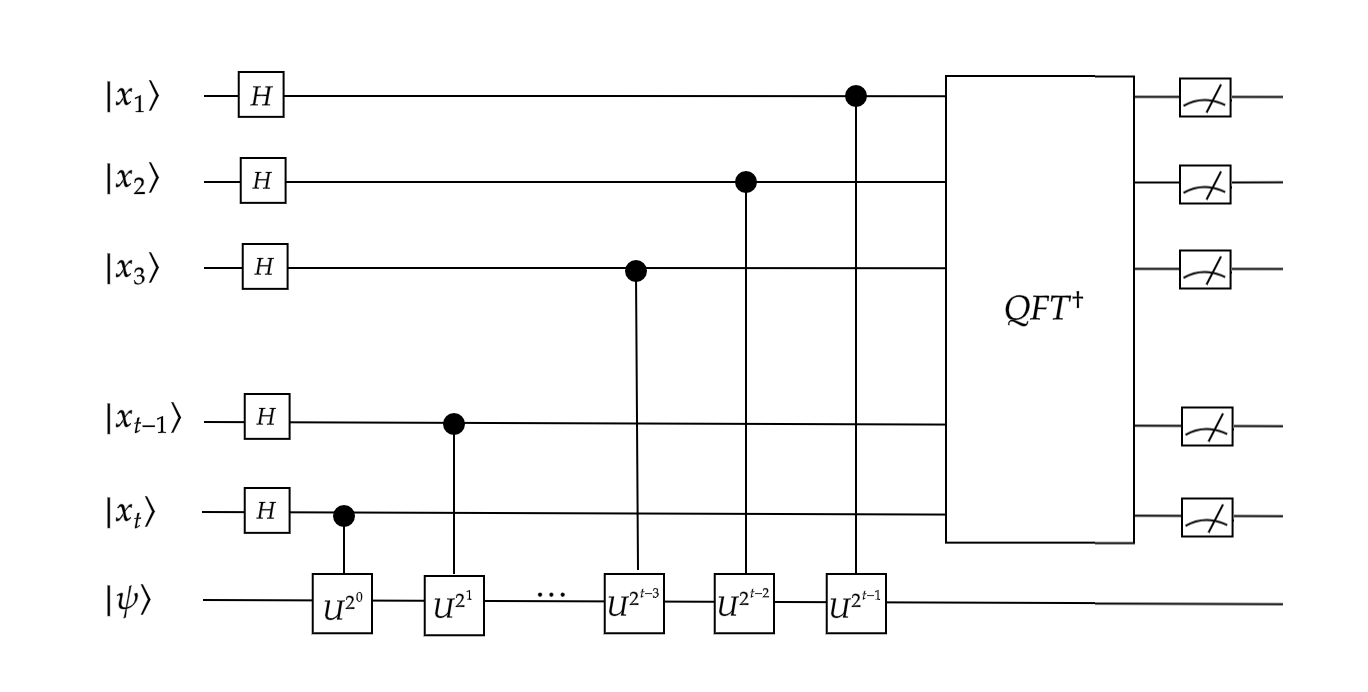

El circuito utiliza $ O(t^2) $ compuertas (operaciones) con $ t $ llamadas de $ CU^{2^j} $.

### Salidas

Si hay $ \ket{j} \in \{ \ket{0},\ldots,\ket{N-1} \} $ que satisface que $ j = N \cdot \phi $, entonces el resultado es $ \ket{j} $ con probabilidad $1$ y por lo tanto 

$$ \phi = \dfrac{j}{N} $$

De lo contrario, $ N \cdot \phi $ está entre los números enteros $ j $ y $ j+1 $ ($ 0 \leq j < j+1 \leq N-1 $), entonces el resultado será $ \ket{j} $ o $ \ket{j+1} $ con alta probabilidad. En cualquier caso, tendremos una estimación de $\phi$:

$$ \dfrac{j}{N} < \phi < \dfrac{j+1}{N} $$

Para tener una mejor estimación, se pueden usar más qubits en el primer registro, es decir, eligiendo 

$$ t = m + \left \lceil \log \left (2 + \frac{1}{2\varepsilon} \right) \right \rceil $$

podemos aproximar $\phi$ con una precisión de $ m $ bits con una probabilidad de éxito de al menos $1 - \epsilon$.

Si tomamos cualquier estado arbitrario en lugar de $\ket{\psi}$, obtenemos una aproximación a uno de los valores propios con cierta probabilidad. La razón es que podemos expresar cualquier estado cuántico como una combinación lineal de los vectores propios.

Como sabemos cómo implementar $QFT^{\dagger}$ de manera eficiente, también hemos obtenido un algoritmo eficiente para la estimación de fase. Muchos problemas interesantes se reducen al problema de estimación de fase.

<a id="3.2"></a>
## 3.2. Implementación en Qiskit

### Operador unitario para un solo qubit control

Consideremos un operador unitario de un solo qubit $ U $ que tiene un vector propio $ \ket{1} $ y un valor propio $ e^{2\pi i \phi} $ donde $\phi = \frac{5}{16} $.

La compuerta `CPhaseGate(2*pi*5/16)` de Qiskit es una buena candidata de $ U $ ya que podemos especificar los exponentes fácilmente.

In [10]:
from qiskit import QuantumCircuit
import numpy as np

def CU(circuit, power, qcontrol, target):

    circuit.cp((2*np.pi*5/16)*(2**power), qcontrol, target)

Ahora elijamos $t=4$ e implementemos el circuito de estimación de fase para estimar $\phi$.

Utilicemos el método `QFT` de Qiskit, para el uso de la $ QFT^\dagger $.

Tengamos en cuenta que debería obtener un resultado exacto ya que $t=4$ es lo suficientemente preciso para este caso.

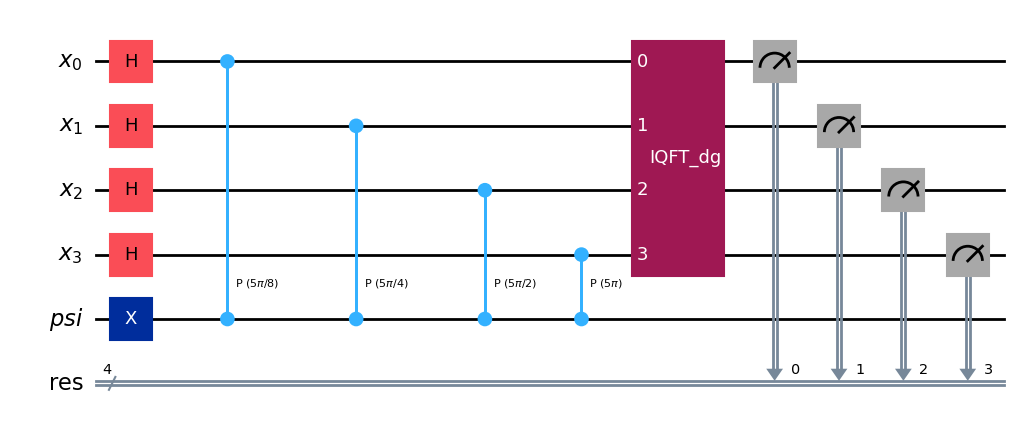

In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 4 # Número de qubits en el registro de control
n = 1 # Número de qubits en el registro que almacena el eigenvector

# Crear t qubits de control
control = QuantumRegister(t, 'x')

# Crear n qubits objetivo
target = QuantumRegister(n, 'psi')

# Crear el circuito
circuit = QuantumCircuit(control, target)

# Aplicar Hadamard a los qubits del primer registro (control)
circuit.h(control)

# Colocar el segundo resistro (target) en el estado |1>
circuit.x(target)

# Aplicar los operadores CU^(2^j)
for j in range(t):
    CU(circuit, j, control[j], target)             # Nota que el orden es inverso porque se trata de Qiskit

# Agregamos la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)

# Agregamos mediciones
cr = ClassicalRegister(t, 'res')
circuit.add_register(cr)
circuit.measure(control, cr)

# Mostramos el circuito
display(circuit.draw('mpl'))

In [12]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

job_sampler.result()

print(job_sampler.result()[0].data.res.get_counts())

{'0101': 1024}


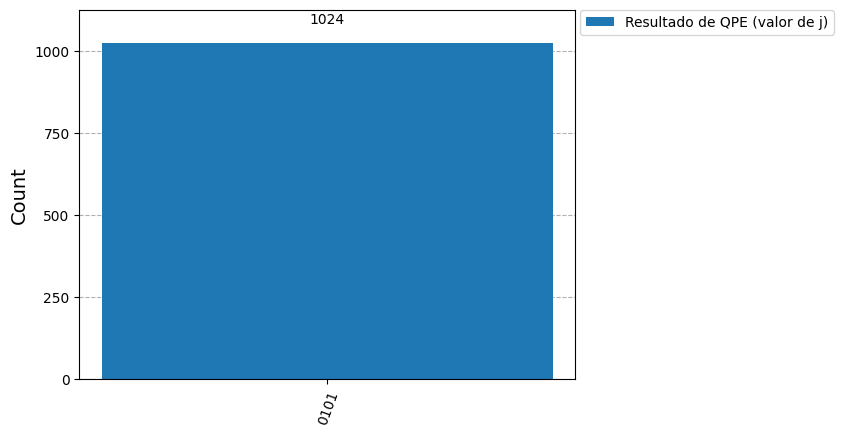

In [13]:
from qiskit.visualization import plot_histogram

plot_histogram([job_sampler.result()[0].data.res.get_counts()], legend=["Resultado de QPE (valor de j)"])

Observamos la salida $0101_2 = 5_{10}$, entonces la fase es:

$$\phi=\frac{j}{N}=\frac{5}{2^4}=\frac{5}{16}$$

¿Qué pasa si usamos solamente $t=3$?

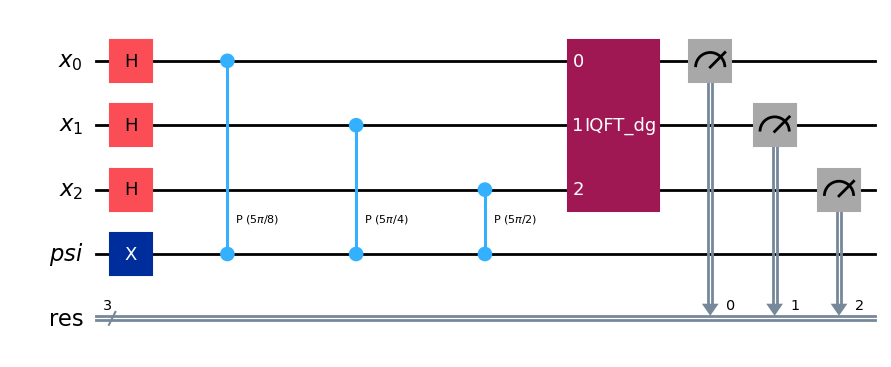

{'010': 405, '011': 432, '000': 22, '100': 56, '001': 54, '111': 16, '110': 13, '101': 26}


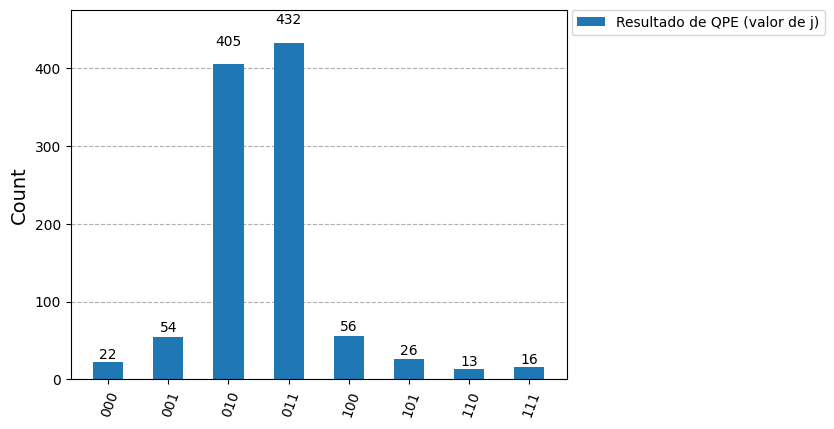

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 3 # Número de qubits en el registro de control                         # <- cambio
n = 1 # Número de qubits en el registro que almacena el eigenvector

# Crear t qubits de control
control = QuantumRegister(t, 'x')

# Crear n qubits objetivo
target = QuantumRegister(n, 'psi')

# Crear el circuito
circuit = QuantumCircuit(control, target)

# Aplicar Hadamard a los qubits del primer registro (control)
circuit.h(control)

# Colocar el segundo resistro (target) en el estado |1>
circuit.x(target)

# Aplicar los operadores CU^(2^j)
for j in range(t):
    CU(circuit, j, control[j], target)             # Nota que el orden es inverso porque se trata de Qiskit

# Agregamos la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)

# Agregamos mediciones
cr = ClassicalRegister(t, 'res')
circuit.add_register(cr)
circuit.measure(control, cr)

# Mostramos el circuito
display(circuit.draw('mpl'))



sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

job_sampler.result()

print(job_sampler.result()[0].data.res.get_counts())

plot_histogram([job_sampler.result()[0].data.res.get_counts()], legend=["Resultado de QPE (valor de j)"])

Las salidas más frecuentes son `010` y `011`, que son $2$ y $3$ en decimal respectivamente, entonces tenemos que

$$ \dfrac{2}{8} <  \phi < \dfrac{3}{8} \Rightarrow \dfrac{4}{16} <  \phi < \dfrac{6}{16}  $$

Ahora trabajemos con $\phi=0.685$.

Es necesario actualizar $CU$:

In [15]:
def CU(circuit, power, qcontrol, target):

    circuit.cp((2*np.pi*0.685)*(2**power), qcontrol, target)

¿Cuál valor de $t$ es el que funcionará en este caso?

In [16]:
for t in range(1, 13):
    
    n = 1 # Número de qubits en el registro que almacena el eigenvector
    
    # Crear t qubits de control
    control = QuantumRegister(t, 'x')
    
    # Crear n qubits objetivo
    target = QuantumRegister(n, 'psi')
    
    # Crear el circuito
    circuit = QuantumCircuit(control, target)
    
    # Aplicar Hadamard a los qubits del primer registro (control)
    circuit.h(control)
    
    # Colocar el segundo resistro (target) en el estado |1>
    circuit.x(target)
    
    # Aplicar los operadores CU^(2^j)
    for j in range(t):
        CU(circuit, j, control[j], target)             # Nota que el orden es inverso porque se trata de Qiskit
    
    # Agregamos la QFT inversa
    circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)
    
    # Agregamos mediciones
    cr = ClassicalRegister(t, 'res')
    circuit.add_register(cr)
    circuit.measure(control, cr)
    
    sampler = StatevectorSampler()
    
    job_sampler = sampler.run([circuit])
    
    job_sampler.result()

    data = job_sampler.result()[0].data.res.get_counts()

    # Encontrar la llave con el valor máximo
    max_key = max(data, key=data.get)
    max_value = data[max_key]

    # Convertir la llave de binario a decimal
    freq = int(max_key, 2)
    
    print(t,": phi is", freq/2**t)

1 : phi is 0.5
2 : phi is 0.75
3 : phi is 0.625
4 : phi is 0.6875
5 : phi is 0.6875
6 : phi is 0.6875
7 : phi is 0.6875
8 : phi is 0.68359375
9 : phi is 0.685546875
10 : phi is 0.6845703125
11 : phi is 0.68505859375
12 : phi is 0.68505859375


### Operador unitario para dos qubits control

Al utilizar `MCPhaseGate` que es una compuerta multicontrolada, podemos obtener un operador para dos dos qubits control.

Fijamos $ \phi = 0.31415926535 $. Por lo tanto, $ \ket{11} $ es un vector propio con valor propio $ \phi $.

In [17]:
def CU2(circuit, power, control, target):

    circuit.mcp((2*np.pi*0.31415926535)*(2**power), control, target)

In [18]:
for t in range(1,13):
    
    n = 2 # Número de qubits en el registro que almacena el eigenvector
    
    # Crear t qubits de control
    control = QuantumRegister(t, 'x')
    
    # Crear n qubits objetivo
    target = QuantumRegister(n, 'psi')
    
    # Crear el circuito
    circuit = QuantumCircuit(control, target)
    
    # Aplicar Hadamard a los qubits del primer registro (control)
    circuit.h(control)
    
    # Colocar el segundo resistro (target) en el estado |11>
    circuit.x(target)
    
    # Aplicar los operadores CU^(2^j)
    for j in range(t):
        CU2(circuit, j, target, control[j])             # Nota que el orden es inverso porque se trata de Qiskit
    
    # Agregamos la QFT inversa
    circuit.compose(QFT(t, inverse=True), inplace=True, qubits=control)
    
    # Agregamos mediciones
    cr = ClassicalRegister(t, 'res')
    circuit.add_register(cr)
    circuit.measure(control, cr)
    
    sampler = StatevectorSampler()
    
    job_sampler = sampler.run([circuit])
    
    job_sampler.result()

    data = job_sampler.result()[0].data.res.get_counts()

    # Encontrar la llave con el valor máximo
    max_key = max(data, key=data.get)
    max_value = data[max_key]

    # Convertir la llave de binario a decimal
    freq = int(max_key, 2)
    
    print(t,": phi is", freq/2**t)

1 : phi is 0.5
2 : phi is 0.25
3 : phi is 0.375
4 : phi is 0.3125
5 : phi is 0.3125
6 : phi is 0.3125
7 : phi is 0.3125
8 : phi is 0.3125
9 : phi is 0.314453125
10 : phi is 0.314453125
11 : phi is 0.31396484375
12 : phi is 0.314208984375


<a id="4"></a>
# 4. Algoritmo de búsqueda de orden

Para números enteros positivos $ x $ y $ N $ donde $x<N$ sin factores primos comunes, el orden de $x$ es el número entero positivo más pequeño (menor) $ r $ tal que 

$$x^r = 1 \mod{N}$$

En el algoritmo de búsqueda de orden, dados $ x $ y $ N $, nuestro objetivo es encontrar $ r $.

<div class="alert alert-block alert-info">
<strong>Ejercicio</strong>: Sea $x=5$ y $N=21$. Graficar $x^ i \mod{N}$ para $i$ valores entre $1$ y $50$ y encontrar el orden de $x$.

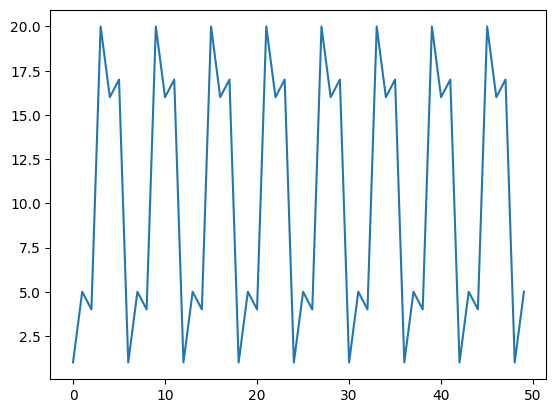

In [19]:
import matplotlib.pyplot as plt
#Create an empty list
l = []
x=5
N=21

#Append x^i mod N values
for i in range (50):
    l.append((x**i) % N)


plt.plot(l)
plt.show()

Comprobemos cada entero y detengámonos cuando encontremos un entero $r$ que satisfaga $x^r = 1 \mod{N}$

$ 5^1 = 5 ~\mod 21 $

$ 5^2 = 4 ~\mod 21 $

$ 5^3 = 20 \mod 21 $

$ 5^4 = 16 \mod 21 $

$ 5^5 = 17 \mod 21 $

$ 5^6 = 1 ~\mod 21 $

Por lo tanto, el orden $r$ es igual a $6$.

No conocemos ningún algoritmo clásico que resuelva este problema en tiempo polinomial en el tamaño de entrada (la cantidad de bits que especifica las entradas $\approx \log N $).

Por otro lado, se puede resolver de manera eficiente utilizando el **algoritmo de estimación de fase**.

### Idea

Dado el par $ (N,x) $, donde $ 1 < x < N $ y $ mcd(N,x) = 1 $ (no tienen ningún factor común mayor que 1).

Sea $ L= \big \lceil \log N \big \rceil $

Entonces, $ U_x $ es un operador reversible clásico (y por lo tanto cuántico) que mapea 

$$ U_x \ket{y} \rightarrow \ket{xy {\mod{N}}}$$

donde $y \in \{ 0, 1\}^L$ y $ 0 \leq y\leq N-1 $.

Suponemos que $ U \ket{y} = \ket{y}$ si $ N \leq y \leq {2^L} - 1 $.

Aunque no conocemos el valor del orden $ r $, sabemos que $ U_x $ tiene algunos vectores propios con valores propios que tienen $ r $ como parte de la fase. Por lo tanto, podemos utilizar el algoritmo de estimación de fase para encontrar $ r $.

<div class="alert alert-block alert-info">
<strong>Ejercicio</strong>: 
    
Sea $\ket{v_0}=\ket{1 \mod{N}}+\ket{x\mod{N}}+\ket{x^2\mod{N}}+ \cdots + \ket{x^{r-1}\mod{N}}$.

Verificar que $ \ket{v_0} $ es un vector propio de $ U_x $ con valor propio 1.

Sea $ \omega = e^{2 \pi i /r} $.

Definimos $\ket{v_1}=\ket{1 \mod{N}}+ \omega^{-1}\ket{x\mod{N}}+\omega^{-2}\ket{x^2\mod{N}}+ \cdots + \omega^{-(r-1)} \ket{x^{r-1}\mod{N}}$

Verificar que $ \ket{v_1} $ también es un vector propio de $ U_x $ con valor propio $ \omega $.

Solución:

\begin{align*}
U_x\ket{v_0} &= U_x\ket{1 \mod{N}} + U_x \ket{x \mod{N}}+ \cdots + U_x \ket{x^{r-1} \mod{N}}\\
&= \ket{x \mod{N}} + \ket{x^2\mod{N}}+ \cdots + \ket{x^{r-1} \mod{N}} + \ket{x^{r} \mod{N}} \\
&= \ket{x \mod{N}} + \ket{x^2\mod{N}}+ \cdots + \ket{x^{r-1} \mod{N}} + \ket{1 \mod{N}} \\
&= \ket{v_0}
\end{align*}

Por lo tanto, $\ket{v_0}$ es un vector propio del operador $U_x$ con valor propio 1.

Ahora comprobamos $\ket{v_1}$.

\begin{align*}
U_x\ket{v_1} &= U_x\ket{1 \mod{N}} + \omega^{-1}U_x  \ket{x \mod{N}}+ \dots +\omega^{-(r-1)} U_x \ket{x^{r-1} \mod{N}}\\
&= \ket{x \mod{N}} + \omega^{-1}\ket{x^2 \mod{N}}+ \dots + \omega^{-(r-1)}\ket{1 \mod{N}} \\
&= \omega( \omega^{-1}\ket{x \mod{N}} + \omega^{-2}\ket{x^2 \mod{N}}+ \dots + \omega^{-(r)}\ket{1 \mod{N}}) \\
&= \omega\ket{v_1}
\end{align*}

El vector $\ket{v_1}$ también es un vector propio del operador $U_x$ pero con valor propio $\omega$.

### Un conjunto especial de vectores propios

A continuación se muestran $ r $ vectores propios de $ U_x $, donde $ \omega = e^{\frac{2 \pi i}{r}} $.

$$
    \begin{array}{rcl}
    \ket{u_0} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^0}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^0}
        \right)  \\
    \ket{u_1} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^1}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^2}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{r-1}}
        \right)  \\
    \ket{u_2} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^2}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^4}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{2(r-1)}}
        \right)  \\
        \vdots ~~~ & \vdots & ~~~~~~~~~~~~~~ \vdots \\
     \ket{u_{r-1}} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{r-1}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{2(r-1)}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-1)(r-1)}}
        \right)  \\
    \end{array}
$$

Aquí cada $ \ket{u_s} $ es un vector propio de $ U_x $ con valor propio $ \omega^s = e^{ \frac{2 \pi i s}{r}} $, donde ($ 0 \leq s \leq r-1 $):

$$
\begin{array}{rcl}
    U_x \ket{u_s} & = & U_x \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-1)s}} \right) \\
        & = & \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{x \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^3\mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r}\mod{N}} }{\omega^{(r-1)s}} \right) \\
        & = & \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{(r-1)s}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-2)s}} \right) \\
        & = & \dfrac{\omega^s}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{rs}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-1)s}} \right) \\
        & = & \dfrac{\omega^s}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{s}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{2s}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-1)s}} \right) \\
        & = & \omega^s \ket{u_s}
\end{array}
$$

Observemos que cada $ \ket{u_s} $ tiene longitud $1$ y, por lo tanto, un estado cuántico. Además, son ortonormales por pares.

La información sobre $r$ está codificada dentro de los valores propios del operador $U_x$ y utilizaremos el **algoritmo de estimación de fase cuántica** para estimar 

$$\frac{s}{r}$$

Para aplicar el algoritmo de estimación de fase, necesitamos preparar el segundo registro para que contenga el estado $\ket{u_s}$, pero hay un problema. El vector propio tiene la variable $r$ mientras que nuestro objetivo es encontrar $r$. ¿Cómo prepararemos el vector propio?

En su lugar, prepararemos una superposición de estos vectores propios 

$$\displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}$$

<div class="alert alert-block alert-info">
<strong>Ejercicio</strong>:

Mostrar que:

$$\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}= \ket{1}$$

Solución:

Revisemos la suma $ \ket{u_0} + \cdots + \ket{u_{r-1}} $:

$$
    \begin{array}{rcl}
    \ket{u_0} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^0}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^0}
        \right)  \\
    \ket{u_1} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^1}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^2}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{r-1}}
        \right)  \\
    \ket{u_2} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^0}+
        \dfrac{ \ket{x \mod{N}} }{\omega^2}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^4}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{2(r-1)}}
        \right)  \\
        \vdots ~~~ & \vdots & ~~~~~~~~~~~~~~ \vdots \\
     \ket{u_{r-1}} & = &
        \dfrac{1}{\sqrt{r}} \left(
        \dfrac{ \ket{1 \mod{N}} }{\omega^{0}}+
        \dfrac{ \ket{x \mod{N}} }{\omega^{r-1}}+
        \dfrac{ \ket{x^2\mod{N}} }{\omega^{2(r-1)}}+ \cdots +
        \dfrac{ \ket{x^{r-1}\mod{N}} }{\omega^{(r-1)(r-1)}}
        \right)  \\
    \end{array}
$$

Notemos que el patrón de $ \omega $ es el mismo que el de la matriz $ QFT^\dagger $.

Por lo tanto, la suma de las columnas (excepto la primera) es cero:

$$
\dfrac{1}{\omega^0} + \dfrac{1}{\omega^s} + \dfrac{1}{\omega^{2s}} + \cdots + \dfrac{1}{\omega^{(r-1)s}}
= 1 + \omega^{-s} + \omega^{-2s} + \cdots + \omega^{-(r-1)s}
= \dfrac{ 1 - \omega^{-rs}}{1-\omega^{-s}} = \dfrac{1-1}{1-\omega^{-s}} = 0.
$$

La suma de la primera columna es $ \dfrac{1}{\sqrt{r}}\Big( r\ket{1} \Big) = \sqrt{r}\ket{1} $.

Por lo tanto 

$$ \dfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}= \dfrac{1}{\sqrt{r}} \Big(\sqrt{r}\ket{1}\Big) = \ket{1}$$

### Vector de entrada

Supongamos que el algoritmo de estimación de fase lleva el estado $\ket{0}\ket{u}$ al estado $\ket{\tilde{\phi_u}}\ket{u}$. En este caso, dada la entrada $\ket{0} \sum_{u} c_u \ket{u}$, el algoritmo genera $\sum_{u} c_u\ket{\tilde{\phi_u}}\ket{u}$.

Si se elige $ t $ como anteriormente, entonces se puede demostrar que la probabilidad de medir $\phi_u$ con una precisión de $ n $ bits es al menos $|c_u|^2(1- \epsilon)$.

Por lo tanto, al combinar esto con el ejercicio anterior, podemos preparar el segundo registro para que contenga el estado $\ket{1}$ al comienzo del algoritmo.

<a id="4.1"></a>
## 4.1. Algoritmo

Utilizamos dos registros con $ t $ y $ L $ qubits.

Elegimos 

$$ t = 2L + 1 + \big \lceil \log \big(2 + \frac{1}{2\epsilon}\big) \big \rceil $$

1) Inicializar los registros como

$$\displaystyle \ket{\psi_0} = \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{0}\ket{u_s} =\ket{0 }\ket{1}$$

Notemos que aquí con $ \ket{0} $, denotamos en realidad $ \ket{0}^{\otimes t} $ y con $ \ket{1} $ denotamos $ \ket{0}^{L-1}\ket{1} $.

2) Aplicar las compuertas $ H $ y $ CU^{2^j} $ como en el algoritmo de estimación de fase.

$$
\ket{\psi_1}=\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\frac{1}{{2^{t/2}}}\sum_{k=0}^{{2^t}-1}e^{\frac{2{\pi}i s k}{r}}\ket{k}\ket{u_s}
$$

3) Aplicar la QFT inversa al primer registro.

$$\frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{\tilde{\phi}}\ket{u_s}$$

4) Medir el primer registro ($t$ qubits).

Para cada $ s $ en el rango $ 0,\ldots, r-1 $, obtenemos una estimación de la fase $\tilde{\phi} = \frac{s}{r}$ precisa hasta $ 2L+1 $ bits con probabilidad de al menos $ \frac{1-\epsilon}{r} $.

Notemos que si $r$ no es una potencia de $2$, entonces no se puede expresar en la forma $\frac{x}{N}$ para algún $ x $ y $ N=2^t $.

5) Realizar el posprocesamiento mediante una computadora clásica.

Ahora la pregunta es ¿cómo encontrar $r$ a partir de la estimación de $s/r$?

La respuesta es usando **fracciones continuas**.

<a id="4.2"></a>
## 4.2. Fracciones continuas

Las fracciones continuas son una representación de un número real mediante una secuencia de números enteros (posiblemente infinitos) utilizando expresiones de la forma:

$$[a_0,...a_n] = a_0 + \frac{1}{a_1 + \frac{1}{a_2 + \frac{1}{...}}}$$

Los racionales $a_0,a_0+\frac{1}{a_1},a_0+\frac{1}{a_1+\frac{1}{a_2}},...$ se denominan convergentes. Todos los convergentes se pueden hallar utilizando operaciones $O(L^3)$ donde $ L $ es el número de bits necesarios para expresar $ m $ y $ n $ en $ \frac{m}{n} $.

<div class="alert alert-block alert-info">
<strong>Ejemplo</strong>:

$\frac{25}{11}$ se puede expresar como $\frac{25}{11}=2+\frac{3}{11}$. Continuando de este modo,

\begin{align*}
=2+\frac{1}{3+\frac{2}{3}} = 2+\frac{1}{3+\frac{1}{\frac{3}{2}}}
\end{align*}

La expresión resultante será

\begin{align*}
2+\frac{1}{3+\frac{1}{1 + \frac{1}{2}}}
\end{align*}

con la expresión de fracción continua $[2,3,1,2]$.

Los convergentes son 
$$c_1=2$$
$$c_2=2 + \frac{1}{3} = \frac{7}{3} $$
$$c_3 = 2 + \frac{1}{3 + \frac{1}{1}} = \frac{9}{4}$$
$$c_4 = 2+ \frac{ 1}{3 + \frac{1}{1 + \frac{1}{2}}} = \frac{25}{11}$$

Definimos dos funciones para calcular expresiones de fracciones continuas y convergentes, que serán útiles en lo siguients.

- `contFrac` toma un parámetro $N$ y devuelve las expresiones de fracciones continuas de $N$ como una lista
- `convergents` toma como parámetro la expresión de fracciones continuas y devuelve la lista de convergentes

In [20]:
def contFrac(N):
    import math
    cf=[]
    while True:
        cf.append(int(N))
        f = N - N//1
        if f < 0.0001:  # o cualquier precisión que se considere lo suficientemente cercana a 0
            break
        N = 1/f
        if(math.ceil(N)-N<0.0001):
            N=round(N)
    return cf


def convergents(cf):
    from fractions import Fraction 
    c=[] 
    cv=[]
    
    for i in range(len(cf)):
        c.append(cf[i])
        for j in range(i-1,-1,-1):
            c[i] = 1/c[i]+ cf[j]
        cv.append(Fraction(c[i]).limit_denominator(10000))
    return cv


Comprobemos las funciones con el ejemplo anterior:

In [21]:
cf = contFrac(25/11)
print(cf)

[2, 3, 1, 2]


In [22]:
cv = convergents(cf)
print(cv)

[Fraction(2, 1), Fraction(7, 3), Fraction(9, 4), Fraction(25, 11)]


### Elección de $t$ (opcional)

El siguiente teorema garantiza que el algoritmo de fracciones continuas produce una buena estimación de $\phi$.

<b>Teorema:</b> Supongamos que $\frac{s}{r}$ es un número racional, de modo que $\displaystyle\left |\frac{s}{r}-\phi \right | \leq \frac{1}{2r^2}$. Entonces $\displaystyle \frac{s}{r}$ es un convergente de la fracción continua para $\phi$ y, por lo tanto, se puede calcular en $O(L^3)$ operaciones, utilizando el algoritmo de fracción continua.

Recordemos que $\phi$ es una aproximación a $\frac{s}{r}$ con una precisión de $2L+1$ bits debido a nuestra elección de $t$. Como $r\leq N \leq 2^L$, obtenemos 

$$\left |\frac{s}{r}-\phi \right | \leq \frac{1}{2^{2L+1}} \leq \frac{1}{2r^2}$$

Ahora bien, según el teorema, $\frac{s}{r}$ es un convergente de la fracción continua para $\phi$.

Calculando los convergentes tenemos valores candidatos para $s$ y $r$ y luego podemos probar si $x^r=1 \mod{N}$. (Recordemos que tenemos más de un convergente y calculamos cada uno de ellos pero no todos nos darán el valor $r$ correcto. Por lo tanto, podría darse el caso de que fallemos en algunos casos).

### Exponenciación modular

En el procedimiento de estimación de fase, hemos asumido que se nos dieron los operadores $U$, $CU$ y sus potencias como funciones de caja negra. En realidad, los operadores $CU^{2^j}$ deberían implementarse de manera eficiente para tener una aceleración frente al algoritmo clásico.

Se debe tener en cuenta que para calcular $x^{2^j}$, no necesitamos realizar multiplicaciones de $2^j$. Una vez que se obtiene $x^2$, se puede obtener $x^4$, $x^8$ de modo que solo necesitamos multiplicaciones de $\log j$. Sin embargo, la multiplicación implica la implementación de la suma y los acarreos.

Lo importante es que se puede realizar utilizando $O(L^3)$ operaciones (compuertas) mediante un procedimiento conocido como **exponenciación modular**. Este es un procedimiento técnico y, en su lugar, continuaremos implementando operadores $CU^{2^j}$ con la funcionalidad incorporada de $Qiskit$.

_Pueden encontrarse más detalles sobre la exponenciación modular en https://arxiv.org/pdf/1207.0511.pdf._

<a id="4.3"></a>
## 4.3. Implementación en Qiskit

Definamos la función `opUx` que genera la compuerta

$$ U_x \ket{y} \rightarrow \ket{xy {\mod{N}}}$$

In [23]:
from qiskit.circuit.library import UnitaryGate


def opUx(N, x):

    k = 1
    while(N > 2**k):
        k = k + 1

    u = np.zeros([2**k, 2**k], dtype = int)

    for i in range(N):
        u[x*i % N][i] = 1
    for i in range(N, 2**k):
        u[i][i] = 1

    return UnitaryGate(u, 'Ux').control(1)


Consideremos $N=20$ y $x=3$, utilicemos el procedimiento de estimación de fase para encontrar las estimaciones para $\frac{s}{r}$.

Elijamos los valores correctos para $t$ y $L$.

Utilicemos la función `QFT` de Qiskit.

Detectemos los resultados con los picos de las frecuencias.

In [24]:
from math import ceil, log2, pi

# Inicialización de parámetros
N = 20
x = 3

# L = ⌈log2(N)⌉
L = ceil(log2(N))

# elijamos el error e=0.1
e = 0.1

# t = 2L + 1 + ⌈log2(2 + 1/(2e))⌉
t = 2*L + 1 + ceil(log2(2 + 1/(2*e)))

print("N =", N)
print("x =", x)
print("L =", L)
print("error =", e)
print("t =", t)

N = 20
x = 3
L = 5
error = 0.1
t = 14


Ahora estamos listos para implementar el algoritmo QPE.

El primer registro tiene $t=14$ qubits.

El segundo registro tiene $L = 5$ qubits.

In [25]:
# Crear registro con t qubits
reg1 = QuantumRegister(t, 't')

# Crear registro con L qubits
reg2 = QuantumRegister(L, 'L')

# Crear el circuito
circuit = QuantumCircuit(reg1, reg2)

# Aplicar Hadamard a los qubits del primer registro
circuit.h(reg1)

# Colocar el último qubit en el segundo registro en |1>
circuit.x(reg2[-1])

# Creamos la compuerta Ux
Ux = opUx(N, x)

# Aplicar los operadores CU^(2^j)
for j in range(t):
    Uxj = Ux**(2**j)
    circuit.append(Uxj, [j] + list(range(t, t+L)))
    
# Agregamos la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=reg1)

# Agregamos mediciones
cr = ClassicalRegister(t, 'res')
circuit.add_register(cr)
circuit.measure(reg1, cr)

In [26]:
sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

data = job_sampler.result()[0].data.res.get_counts()

for outcome in data:
    print(int(outcome,2), "\tobservado", data[outcome], "veces")

0 	observado 228 veces
8192 	observado 245 veces
4096 	observado 269 veces
12288 	observado 282 veces


Los picos ocurren en $0$, $4096$, $8192$ y $12288$.

Ahora, para cada uno de los posibles resultados, intentaremos averiguar el valor de $r$ utilizando el algoritmo de fracciones continuas.

1) El resultado $0$, no nos da ningún resultado significativo.

2) Revisemos $\dfrac{4096}{2^{14}}$.

In [27]:
cf = contFrac(4096/2**14)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 4)]


El candidato es $s'=1$ y $r'=4$. De hecho, la respuesta es 4. Verifiquemos también los otros casos.

3) Revisemos $ \dfrac{8192}{2^{14}} $.

In [28]:
cf = contFrac(8192/2**14)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 2)]


Del resultado $8192$, no podemos obtener el resultado correcto. La razón es que $s=2$ y $r=4$ no son primos relativos y, como resultado, obtenemos $s'=1$ y $r'=2$.

4) Revisemos $ \dfrac{12288}{2^{14}} $.

In [29]:
cf = contFrac(12288/2**14)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 1), Fraction(3, 4)]


El candidato es $s'=3$ y $r'=4$. Obtenemos así, el resultado correcto: 

$$r=4$$

### Observaciones sobre el algoritmo

El algoritmo puede producir una estimación incorrecta de $\frac{s}{r}$, que ocurre con una probabilidad máxima de $ \epsilon $. Podemos disminuir $ \epsilon $ con el costo de aumentar el tamaño del circuito.

Los números $s$ y $r$ pueden tener un factor común, y podemos obtener $r'$ (que es un factor de $r$) en lugar de $r$. Sin embargo, la cantidad de primos que son menores que $r$ es al menos $\frac{r}{2}\log r$. Con una cantidad constante de repeticiones del algoritmo, se pueden obtener $s$ y $r$ que son primos entre sí con una alta probabilidad.

En general, tenemos un algoritmo que utiliza $O(L^3)$ compuertas, $ O(L) $ qubits y repeticiones constantes.
- La operación Hadamard al principio requiere $ O(L) $ compuertas
- $ QFT^\dagger $ requiere $ O(L^2) $ compuertas
- $ O(L^3) $ compuertas son necesarias para la exponenciación modular
- El algoritmo de fracción continua requiere $ O(L^3) $ procesamientos clásicos

El mejor algoritmo clásico para encontrar el orden es el de tiempo exponencial, mientras que tenemos un circuito cuántico de tamaño polinomial para encontrar el orden.

<a id="5"></a>
# 5. Algoritmo de Shor

El algoritmo de Shor proporciona un algoritmo cuántico de tiempo polinomial para el problema de factorización. El algoritmo clásico mejor conocido para factorizar números enteros es de tiempo exponencial.

Ya hemos visto el ingrediente cuántico principal del algoritmo de Shor, que es el procedimiento de búsqueda de orden. Ahora, combinaremos todo lo que hemos aprendido hasta ahora.

### Definición del problema

Dado un entero positivo $N$, ¿qué números primos, al multiplicarse entre sí, dan como resultado $N$?

Cabe señalar también que el problema inverso es fácil. Si ya se han dado los números primos, se pueden multiplicar para comprobar si son realmente los factores de $N$. Esta propiedad del problema se encuentra en el centro de los algoritmos de cifrado que se utilizan ampliamente en la actualidad. Por lo tanto, la computación cuántica plantea un gran desafío para los sistemas criptográficos.

Ya se sabía que el problema de factorización se puede reducir al problema de búsqueda de orden. **Shor fue capaz de encontrar el algoritmo de tiempo polinomial para la búsqueda de orden**, lo que en general dio como resultado un algoritmo de tiempo polinomial para el problema de factorización. En el trasfondo del algoritmo de Shor se encuentra la aceleración exponencial que proviene de la _Transformada Cuántica de Fourier_.

Todavía no se sabe si $\mathsf{P}^{[1]}$ es un subconjunto propio de $\mathsf{BQP}^{[2]}$. Si algún día alguien puede demostrar que la factorización de números enteros no se puede resolver en tiempo polinomial de manera clásica, entonces esto demostrará que $\mathsf{P}$ es un subconjunto propio de $\mathsf{BQP}$.

El algoritmo de Shor y la transformada cuántica de Fourier son importantes por ser uno de los primeros ejemplos de aceleración exponencial cuántica sobre algoritmos clásicos.

_$^1$ La clase de problemas que se pueden resolver en tiempo polinomial en una computadora clásica._

_$^2$ La clase de problemas que se pueden resolver en tiempo polinomial en una computadora cuántica con alta probabilidad._

<a id="5.1"></a>
## 5.1. Algoritmo

1. Elegir $x$ aleatoriamente en el rango $1$ a $N-1$, de modo que $gcd(x,N)=1$. (Si $gcd(x,N)=d>1 $, entonces $d$ ya es un factor de $ N $).
2. Usar el algoritmo de búsqueda de orden para encontrar el orden de $x\mod{N}$, que se denotará con $r$.
3. Si $r$ es par y $x^{r/2} \neq -1 \mod{N}$, entonces calcular $gcd(x^{r/2} -1, N)$ y $gcd(x^{r/2}+1, N)$.
4. Probar para ver si uno de estos es un factor no trivial. Si es así, devolver el resultado; de lo contrario, el algoritmo falla. Si ese es el caso, repetir.

<b>Observación:</b> Si $r$ es par y $x^{r/2} \neq -1 \mod{N}$, entonces se puede demostrar que $gcd(x^{r/2} -1, N)$ o $gcd(x^{r/2}+1, N)$ debe ser un factor de $N$. Se encuentra una $r$ de este tipo con una probabilidad mayor que $1/2$. Puedes consultar los dos teoremas al final de este notebook.

La parte principal del algoritmo de Shor es el paso 2, en el que encontramos el orden utilizando un circuito de estimación de fase. Una vez que el orden satisface las propiedades requeridas, el resto es calcular el máximo común divisor. Como ya hemos implementado el procedimiento de búsqueda de orden, ya hemos implementado el algoritmo de Shor.

Sin embargo, examinaremos el algoritmo de Shor con más detalle. Comenzaremos estimando algunas probabilidades con respecto a la elección de $r$.

### Ejemplo clásico

A continuación, calcularemos los factores de $N$ utilizando la misma idea que en el algoritmo de Shor, pero calcularemos $r$ de manera clásica. 

$$ $$

Sea $N=111$. ¿Qué porcentaje de los elementos menores que $N$ son primos entre sí con $N$? 

Escribamos código para averiguarlo.

Se puede usar la función `gdc` de `numpy`.

In [30]:
import numpy as np

# Crear una lista vacía
rlist=[]
N=111

# Si es relativamente primo con N, añádirlo a la lista
for i in range(1,N):
    if np.gcd(N,i)==1:
        rlist.append(i)

print(rlist)

print(len(rlist)*100/N, "% de los números enteros son primos entre sí con", N)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110]
64.86486486486487 % de los números enteros son primos entre sí con 111


Calculemos el orden de cada elemento $ x $ que sea primo relativo con $N$.

¿Qué porcentaje de los $ x $ tienen orden par y satisfacen $x^{r/2} \neq -1 \mod{N}$?

Coloquemos los elementos que satisfacen las condiciones en un diccionario junto con su orden.

In [31]:
import numpy as np
counter=0
# Esto contendrá la lista de números enteros que satisfacen las condiciones junto con el orden.
satisfy={}

# rlist contiene los números relativamente primos con N
for i in range(len(rlist)):
    r=1;
    while(1):
        if (rlist[i]**r)%N==1:
            if(r%2==0 and ((rlist[i]**int(r/2))%N != N-1)):
                counter=counter+1
                print("Orden de",rlist[i],":",r)
                satisfy[rlist[i]]=r
            break
        r=r+1

print(counter*100/N, "% de los números enteros satisfacen las condiciones")

Orden de 2 : 36
Orden de 4 : 18
Orden de 5 : 36
Orden de 8 : 12
Orden de 13 : 36
Orden de 14 : 12
Orden de 17 : 36
Orden de 19 : 36
Orden de 20 : 36
Orden de 22 : 36
Orden de 23 : 12
Orden de 25 : 18
Orden de 26 : 6
Orden de 28 : 18
Orden de 29 : 12
Orden de 31 : 4
Orden de 32 : 36
Orden de 35 : 36
Orden de 38 : 2
Orden de 40 : 18
Orden de 43 : 4
Orden de 44 : 18
Orden de 47 : 6
Orden de 50 : 36
Orden de 52 : 36
Orden de 53 : 18
Orden de 55 : 36
Orden de 56 : 36
Orden de 58 : 18
Orden de 59 : 36
Orden de 61 : 36
Orden de 64 : 6
Orden de 67 : 18
Orden de 68 : 4
Orden de 71 : 18
Orden de 73 : 2
Orden de 76 : 36
Orden de 79 : 36
Orden de 80 : 4
Orden de 82 : 12
Orden de 83 : 18
Orden de 85 : 6
Orden de 86 : 18
Orden de 88 : 12
Orden de 89 : 36
Orden de 91 : 36
Orden de 92 : 36
Orden de 94 : 36
Orden de 97 : 12
Orden de 98 : 36
Orden de 103 : 12
Orden de 106 : 36
Orden de 107 : 18
Orden de 109 : 36
48.648648648648646 % de los números enteros satisfacen las condiciones


Elijamos al azar una de las $x$ que encontramos previamente y calculemos el $mcd(x^{r/2}-1,N)$ y el $mcd(x^{r/2}+1,N)$.

In [36]:
import random

# Elegir un número entero aleatorio
rand_index = random.randint(0, len(satisfy))

# Elegir una 'x' al azar y su orden del diccionario que hemos creado arriba
x, r = random.choice(list(satisfy.items()))
print(x, "el elegido con orden", r)

# Calcular el mcd (máximo común divisor)
print("Factores de", N, ":", np.gcd((x**int(r/2)-1), N), "y", np.gcd((x**int(r/2)+1), N))

47 el elegido con orden 6
Factores de 111 : 37 y 3


En las tareas anteriores, calculamos los factores de $N$ utilizando la misma idea que en el algoritmo de Shor, pero calculamos $r$ de manera clásica. 

**La principal ventaja del algoritmo de Shor es poder calcular $r$ de manera eficiente.**

<a id="5.2"></a>
## 5.2. Ejemplo: Factorización de $21$

Ahora estamos listos para factorizar $21$, utilizando el circuito de estimación de fase que ya hemos implementado.

Factoricemos $21$ usando el algoritmo de Shor:

1. Elijamos un $x$ aleatorio que sea primo relativo con $21$.
2. Apliquemos el circuito de estimación de fase al operador $U_x$.
3. Usemos el algoritmo de fracciones continuas para encontrar $r$.
4. Calculemos $mcd(x^{r/2} -1, N)$ y $mcd(x^{r/2}+1, N)$

In [37]:
N = 21

In [38]:
# Elejir un x aleatorio que sea primo relativo con N

import random as rand
import numpy as np

counter = 0

while(True):
    x = rand.randrange(2,N)
    counter = counter + 1
    if np.gcd(x,N)==1:
        break

print(x, "es elegido después de", counter, "intentos")

2 es elegido después de 1 intentos


In [39]:
from math import ceil, log2, pi
# inicializar el resto de parámetros

# L = ⌈log2(N)⌉
L = ceil(log2(N))

# elijamos el error e=0.1
e = 0.1
# t = 2L + 1 + ⌈log2(2+1/(2e))⌉
t = 2*L + 1 + ceil(log2(2+1/(2*e)))

print("N =",N)
print("x =",x)
print("L =",L)
print("error =",e)
print("t =",t)

N = 21
x = 2
L = 5
error = 0.1
t = 14


In [40]:
# Algoritmo de estimación de fase cuántica

# Crear registro con t qubits
reg1 = QuantumRegister(t, 't')

# Crear registro con L qubits
reg2 = QuantumRegister(L, 'L')

# Crear el circuito
circuit = QuantumCircuit(reg1, reg2)

# Aplicar Hadamard a los qubits del primer registro
circuit.h(reg1)

# Colocar el último qubit en el segundo registro en |1>
circuit.x(reg2[-1])

# Creamos la compuerta Ux
Ux = opUx(N, x)

# Aplicar los operadores CU^(2^j)
for j in range(t):
    Uxj = Ux**(2**j)
    circuit.append(Uxj, [j] + list(range(t, t+L)))
    
# Agregamos la QFT inversa
circuit.compose(QFT(t, inverse=True), inplace=True, qubits=reg1)

# Agregamos mediciones
cr = ClassicalRegister(t, 'res')
circuit.add_register(cr)
circuit.measure(reg1, cr)


# Simulación

sampler = StatevectorSampler()

job_sampler = sampler.run([circuit])

data = job_sampler.result()[0].data.res.get_counts()

for outcome in data:
    print(int(outcome,2), "\tobservado", data[outcome], "veces")

5461 	observado 122 veces
0 	observado 162 veces
13654 	observado 33 veces
2731 	observado 120 veces
10923 	observado 114 veces
2730 	observado 31 veces
8192 	observado 162 veces
10924 	observado 6 veces
5460 	observado 15 veces
10922 	observado 30 veces
13653 	observado 121 veces
10938 	observado 1 veces
2739 	observado 1 veces
10894 	observado 1 veces
13652 	observado 8 veces
5457 	observado 3 veces
10921 	observado 3 veces
13648 	observado 1 veces
5463 	observado 4 veces
5462 	observado 31 veces
2750 	observado 1 veces
10915 	observado 1 veces
5459 	observado 2 veces
10928 	observado 1 veces
10861 	observado 1 veces
2732 	observado 10 veces
11697 	observado 1 veces
2735 	observado 2 veces
10933 	observado 1 veces
13657 	observado 3 veces
13650 	observado 2 veces
13635 	observado 1 veces
2728 	observado 1 veces
2733 	observado 3 veces
13658 	observado 2 veces
2729 	observado 1 veces
5466 	observado 1 veces
5464 	observado 1 veces
13651 	observado 3 veces
13569 	observado 1 veces
2734

In [41]:
# Descartar 0 y los resultados con baja frecuencia

good = []
for outcome in data:
    if outcome == 0: continue
    if data[outcome] > 10:
        good.append(int(outcome, 2))
print(good)

[5461, 0, 13654, 2731, 10923, 2730, 8192, 5460, 10922, 13653, 5462]


In [42]:
# Ejecutar el algoritmo de fracciones continuas para averiguar r

for b in good:
    print("para b =",b)
    cf = contFrac(b/(2**t))
    print(cf)
    cv = convergents(cf)
    print(cv)
    print()

para b = 5461
[0, 3, 5461]
[Fraction(0, 1), Fraction(1, 3), Fraction(3333, 10000)]

para b = 0
[0]
[Fraction(0, 1)]

para b = 13654
[0, 1, 5, 682, 2]
[Fraction(0, 1), Fraction(1, 1), Fraction(5, 6), Fraction(3411, 4093), Fraction(6827, 8192)]

para b = 2731
[0, 5, 1, 1364, 2]
[Fraction(0, 1), Fraction(1, 5), Fraction(1, 6), Fraction(1365, 8189), Fraction(1366, 8195)]

para b = 10923
[0, 1, 2, 5461]
[Fraction(0, 1), Fraction(1, 1), Fraction(2, 3), Fraction(6667, 10000)]

para b = 2730
[0, 6, 682, 2]
[Fraction(0, 1), Fraction(1, 6), Fraction(682, 4093), Fraction(1365, 8192)]

para b = 8192
[0, 2]
[Fraction(0, 1), Fraction(1, 2)]

para b = 5460
[0, 3, 1365]
[Fraction(0, 1), Fraction(1, 3), Fraction(1365, 4096)]

para b = 10922
[0, 1, 1, 1, 2730]
[Fraction(0, 1), Fraction(1, 1), Fraction(1, 2), Fraction(2, 3), Fraction(5461, 8192)]

para b = 13653
[0, 1, 4, 1, 1364, 2]
[Fraction(0, 1), Fraction(1, 1), Fraction(4, 5), Fraction(5, 6), Fraction(6824, 8189), Fraction(6829, 8195)]

para b = 546

Establecer manualmente $r$ a continuación.

In [43]:
# Comprobar si r es par y x^{r/2} no es igual a -1 Mod N

r = 6  #2
if (r%2==0 and (x**(r/2))%N != -1) :
    print("Proceder")
else:
    print("Repetir el algoritmo")

Proceder


Notemos que es posible que no se pueda obtener el valor de $r$ en el primer intento. En ese caso, deberemos repetir el algoritmo.

Ahora verifiquemos $gcd(x^{r/2} -1, N)$ y $gcd(x^{r/2}+1, N)$.

In [44]:
# Calcular mcd para encontrar los factores de N

print("N=",N)
print("x=",x)
print("r=",r)
print("(x**int(r/2)-1)=",(x**int(r/2)-1))
print("(x**int(r/2)+1)=",(x**int(r/2)+1))
print("Factores de", N, ":", np.gcd((x**int(r/2)-1), N), "y", np.gcd((x**int(r/2)+1), N))

N= 21
x= 2
r= 6
(x**int(r/2)-1)= 7
(x**int(r/2)+1)= 9
Factores de 21 : 7 y 3


### Teoremas (opcional)

#### Teorema 1
Supóngase que $N$ es un número compuesto de $L$ bits y que $x$ es una solución no trivial de la ecuación $x^2 = 1 \mod{N}$ en el rango $1\leq x \leq N$, es decir, no es ni $x=1 \mod{N}$ ni $x=N-1=-1 \mod{N}$. Entonces, al menos uno de los $mcd(x-1,N)$ y $mcd(x+1,N)$ es un factor no trivial de $N$ que se puede calcular utilizando $O(L^3)$ operaciones.

#### Teorema 2
Supóngase que $N={p_1}^{l_1} \dots {p_m}^{l_m}$ es la factorización prima de un entero positivo compuesto impar. Sea $x$ un entero elegido de manera uniforme al azar, tal que $0 \leq x \leq N-1$ y $x$ es coprimo de $N$. Sea $r$ el orden de $x \mod{N}$. En tal caso,
\begin{align*}
P(\text{r es par y } {x}^{r/2} \neq -1 \mod{N}) > 1- \frac{1}{2^{m-1}}.
\end{align*}